In [1]:
import sympy

import sympy_utils
from sympy_utils import short_latex, ShortLatexPrinter, matsym, vec, dynvec, SympyDumpable, dynamicsymbols

import model
from model import Model
import algorithms
from algorithms import StaticLinearization, DynamicLinearization

sympy.init_session(latex_printer=short_latex)

IPython console for SymPy 1.4 (Python 3.7.3-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



In [2]:
def latex_dump(expr, file='/tmp/latex-tmp-dump'):
    with open(file, 'w') as tmpfile:
        tmpfile.write(short_latex(expr, order='lex'))
        
def subs_varphi(expr):
    varphi_subs = {
        model.model_full_q[3]: dynamicsymbols('varphi_1'), 
        model.model_full_q[3+3]: dynamicsymbols('varphi_2'), 
        model.model_simplified_q[4]: dynamicsymbols('varphi_u1'), 
        model.model_simplified_q[4+2]: dynamicsymbols('varphi_u2'), 
    }
    return expr.subs(varphi_subs)

def model_G_eq(model):
    return Eq(sympy_utils.matsym('G(q)', model.G), subs_varphi(model.G))

In [3]:
# import model data from file
mapping = [
    ('full_1', Model),
    ('full_1_static', StaticLinearization),
    ('full_1_dynamic', DynamicLinearization),
    ('full_2', Model),
    ('full_2_static', StaticLinearization),
    ('full_2_dynamic', DynamicLinearization),
    ('full_2_JPTD', Model),
    ('full_2_JPTD_static', StaticLinearization),
    ('full_2_JPTD_dynamic', DynamicLinearization),
    ('simplified', Model),
    ('simplified_static', StaticLinearization),
    ('simplified_dynamic_1', DynamicLinearization),
    ('simplified_dynamic_2', DynamicLinearization),
]

models = SympyDumpable.load('generated_models.json', mapping)

# Full model 1 (1 spinning) 

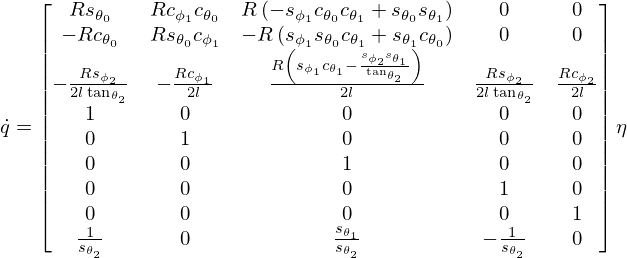

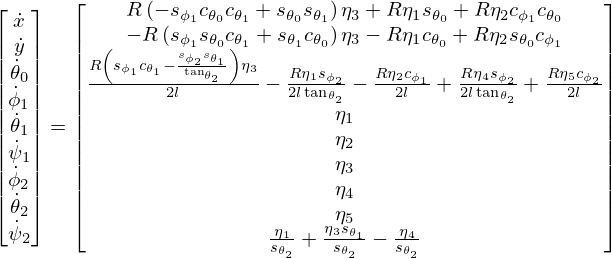

In [4]:
m = models['full_1']

display(m.show_as_matrices())
display(m.show_as_equations())

latex_dump(subs_varphi(m.show_as_matrices()), '/tmp/full_model_1.tex')

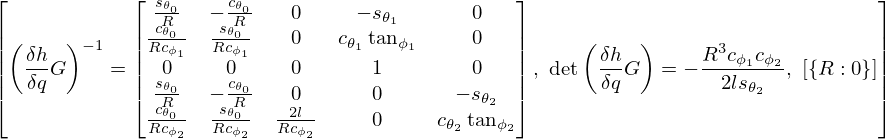

In [5]:
alg = models['full_1_static']

alg.show(m)

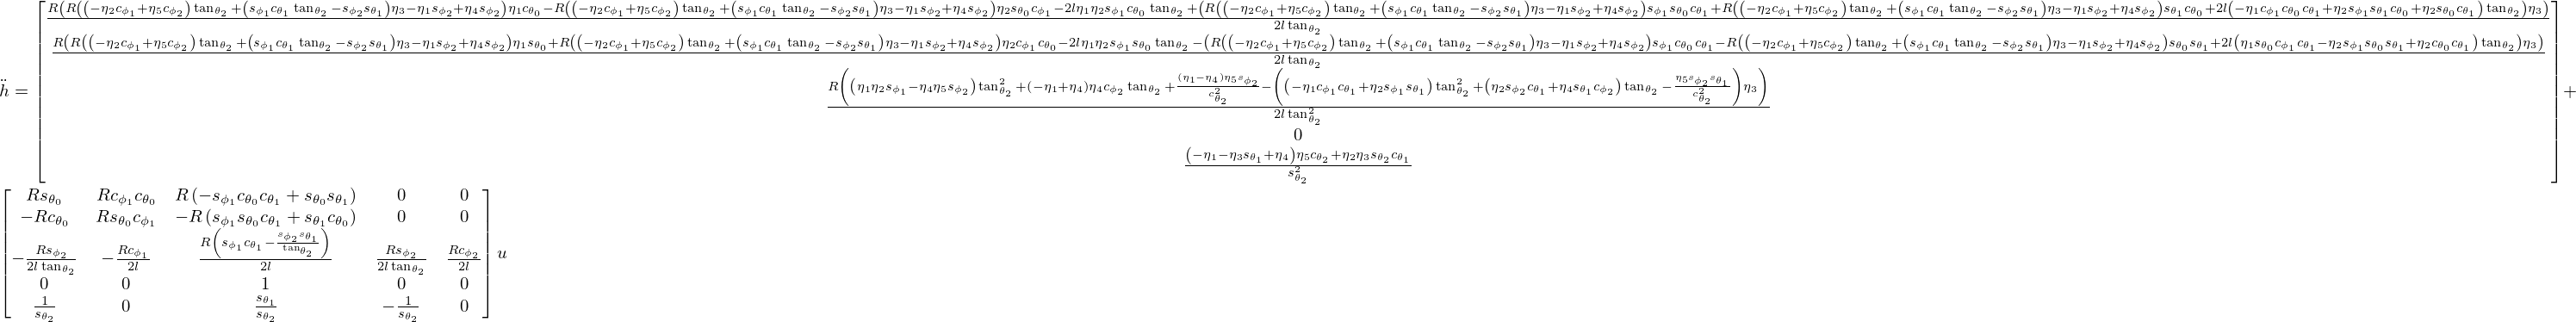

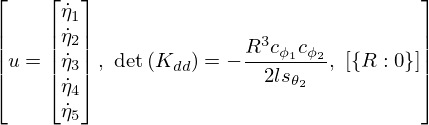

In [6]:
alg = models['full_1_dynamic']

eqs = alg.show(m)

display(eqs[0])
display(eqs[1:])

# Full model 2 (both spinnings)

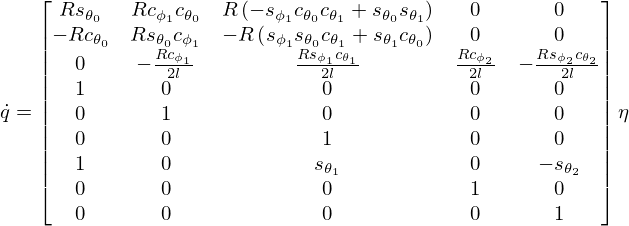

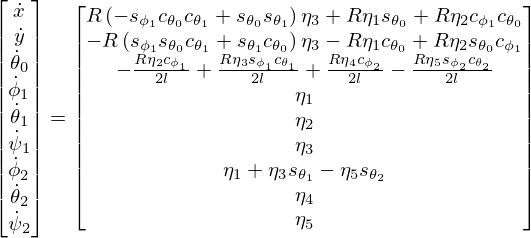

In [7]:
m = models['full_2']

display(m.show_as_matrices())
display(m.show_as_equations())

latex_dump(subs_varphi(m.show_as_matrices()), '/tmp/full_model_2.tex')

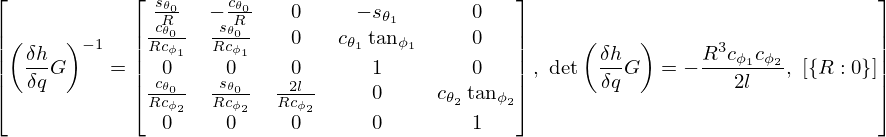

In [8]:
alg = models['full_2_static']

alg.show(m)

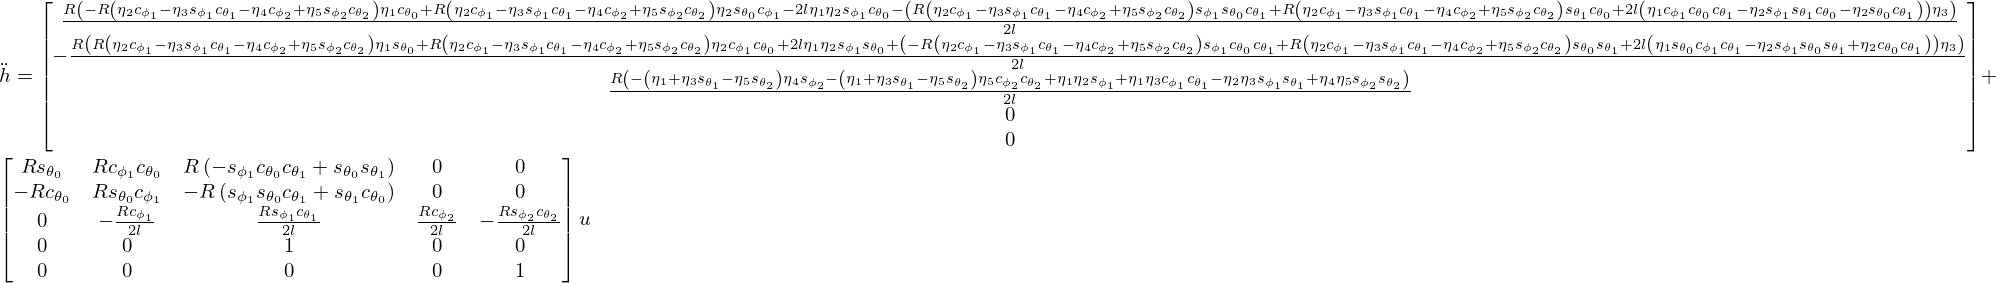

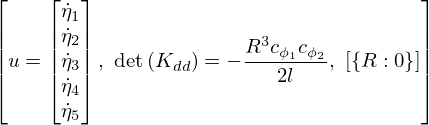

In [9]:
alg = models['full_2_dynamic']

eqs = alg.show(m)

display(eqs[0])
display(eqs[1:])

# JPTD (full model 2)

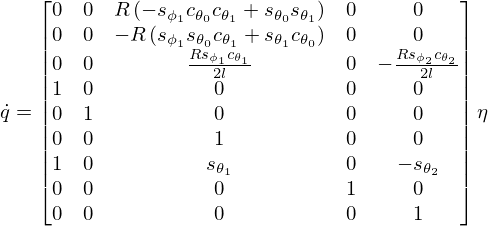

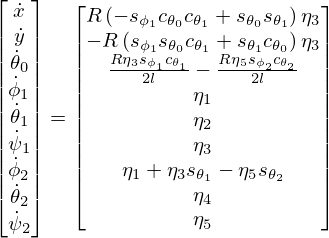

In [10]:
m = models['full_2_JPTD']

display(m.show_as_matrices())
display(m.show_as_equations())

latex_dump(subs_varphi(m.show_as_matrices()), '/tmp/jptd_full_model_2.tex')

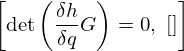

In [11]:
alg = models['full_2_JPTD_static']

alg.show(m)

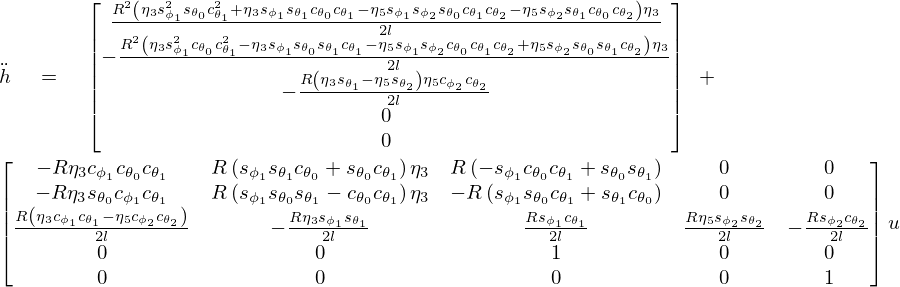

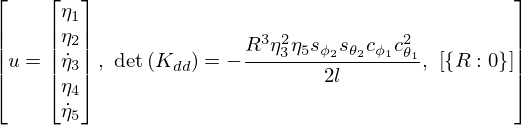

In [12]:
alg = models['full_2_JPTD_dynamic']

eqs = alg.show(m)

display(eqs[0])
display(eqs[1:])

#  Simplified model

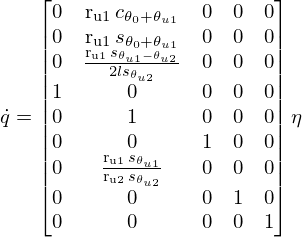

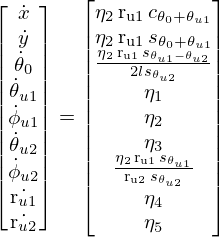

In [13]:
m = models['simplified']

display(m.show_as_matrices())
display(m.show_as_equations())

latex_dump(subs_varphi(m.show_as_matrices()), '/tmp/simplified_model.tex')

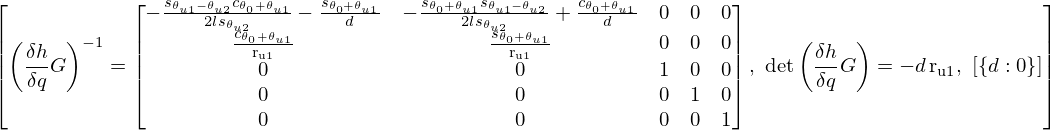

In [14]:
alg = models['simplified_static']

alg.show(m)

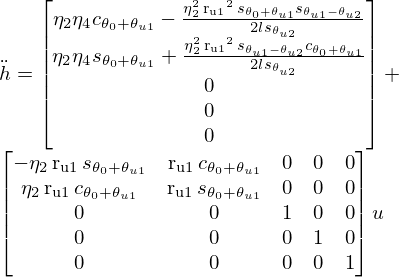

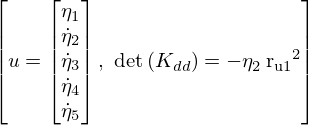

In [15]:
alg = models['simplified_dynamic_1']

eqs = alg.show(m)

display(eqs[0])
display(eqs[1:])

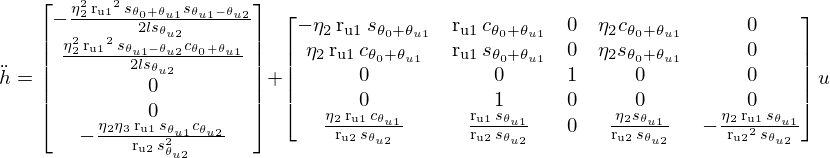

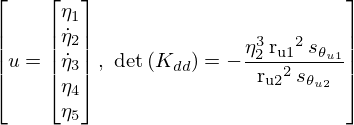

In [16]:
alg = models['simplified_dynamic_2']

eqs = alg.show(m)

display(eqs[0])
display(eqs[1:])

**Conversion**

In [17]:
q_in = sympy.Matrix([m.q[4], m.q[7], m.q[3]])
eq = Eq(q_in, model.convert_simplified_to_full(q_in))

latex_dump(subs_varphi(eq), '/tmp/simplified_to_full.tex')

[Warning] convert_simplified_to_full has not been verified


In [18]:
q_in = sympy.Matrix([models['full_2'].q[5], models['full_2'].q[3], models['full_2'].q[4]])
eq = Eq(q_in, model.convert_full_to_simplified(q_in))

latex_dump(subs_varphi(eq), '/tmp/full_to_simplified.tex')

[Warning] convert_full_to_simplified has not been verified


[Warning] convert_full_to_simplified has not been verified
[Warning] convert_simplified_to_full has not been verified


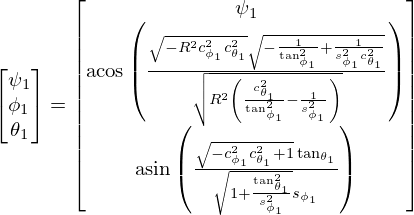

In [19]:
q_in = sympy.Matrix([models['full_2'].q[5], models['full_2'].q[3], models['full_2'].q[4]])

res = model.convert_simplified_to_full(model.convert_full_to_simplified(q_in))
res.simplify()
Eq(q_in, res)

[Warning] convert_simplified_to_full has not been verified
[Warning] convert_full_to_simplified has not been verified


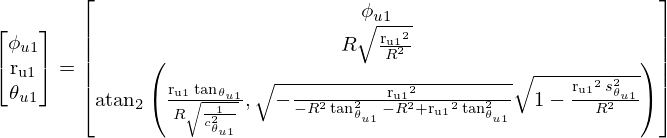

In [20]:
q_in = sympy.Matrix([m.q[4], m.q[7], m.q[3]])

res = model.convert_full_to_simplified(model.convert_simplified_to_full(q_in))
res.simplify()
Eq(q_in, res)

In [21]:
# sympy.plotting.plot3d(res[2].subs({
#     model.R: 1.0, 
#     m.q[4]: Symbol('phi'),
# #     m.q[4]: 1.0,
#     m.q[7]: Symbol('r'),
# #     m.q[7]: 1.0,
# #     m.q[3]: Symbol('theta'),
#     m.q[3]: 1.0,
#     }), 
#              (Symbol('phi'), -1, 1),
#              (Symbol('r'), -1, 1),
#             )

# sympy.plotting.plot3d(res[2].subs({
#     model.R: 1.0, 
# #     m.q[4]: Symbol('phi'),
#     m.q[4]: 1.0,
#     m.q[7]: Symbol('r'),
# #     m.q[7]: 1.0,
#     m.q[3]: Symbol('theta'),
# #     m.q[3]: 1.0,
#     }), 
#              (Symbol('theta'), -1, 1),
#              (Symbol('r'), -1, 1),
#             )